In [3]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet 

In [4]:
df = pd.read_csv("ADANIPORTS.csv")

In [5]:
df.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [6]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [8]:
df["Trades"].unique()

array([   nan, 19171., 16176., ..., 34835., 32309., 37742.])

In [9]:
df["Trades"]=df["Trades"].fillna(df["Trades"].mean())

In [10]:
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,38201.045394,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,38201.045394,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,38201.045394,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,38201.045394,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,38201.045394,816123,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3108,2020-06-24,ADANIPORTS,EQ,355.65,355.35,360.00,349.6,352.2,351.85,355.39,2841354,1.009787e+14,43565.000000,1130322,0.3978
3109,2020-06-25,ADANIPORTS,EQ,351.85,349.80,351.50,342.2,345.5,344.00,346.14,5056963,1.750402e+14,53008.000000,2467305,0.4879
3110,2020-06-26,ADANIPORTS,EQ,344.00,348.00,349.00,339.6,343.8,343.20,343.63,3979519,1.367489e+14,34835.000000,1805050,0.4536
3111,2020-06-29,ADANIPORTS,EQ,343.20,341.35,344.05,339.1,343.0,342.65,341.58,3263757,1.114818e+14,32309.000000,1550398,0.4750


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3113 entries, 0 to 3112
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3113 non-null   object 
 1   Symbol              3113 non-null   object 
 2   Series              3113 non-null   object 
 3   Prev Close          3113 non-null   float64
 4   Open                3113 non-null   float64
 5   High                3113 non-null   float64
 6   Low                 3113 non-null   float64
 7   Last                3113 non-null   float64
 8   Close               3113 non-null   float64
 9   VWAP                3113 non-null   float64
 10  Volume              3113 non-null   int64  
 11  Turnover            3113 non-null   float64
 12  Trades              3113 non-null   float64
 13  Deliverable Volume  3113 non-null   int64  
 14  %Deliverble         3113 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 364.9

In [12]:
df.head(2)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.0,770.0,1050.0,770.0,959.0,962.9,984.72,27294366,2.687719e+15,38201.045394,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.9,984.0,990.0,874.0,885.0,893.9,941.38,4581338,4.312765e+14,38201.045394,1453278,0.3172


In [13]:
df=df[["Date","Open"]]

In [14]:
df.head(2)

,Date,Open
0,2007-11-27,770.0
1,2007-11-28,984.0


In [14]:
df.columns= ["ds","y"]

In [16]:
df["ds"] = pd.to_datetime(df["ds"])

C:\Users\Admin\AppData\Local\Temp\ipykernel_1956\1982822988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ds"] = pd.to_datetime(df["ds"])


In [19]:
df.head()

,ds,y
0,2007-11-27,770.00
1,2007-11-28,984.00
2,2007-11-29,909.00
3,2007-11-30,890.00
4,2007-12-03,939.75


<AxesSubplot:xlabel='ds'>

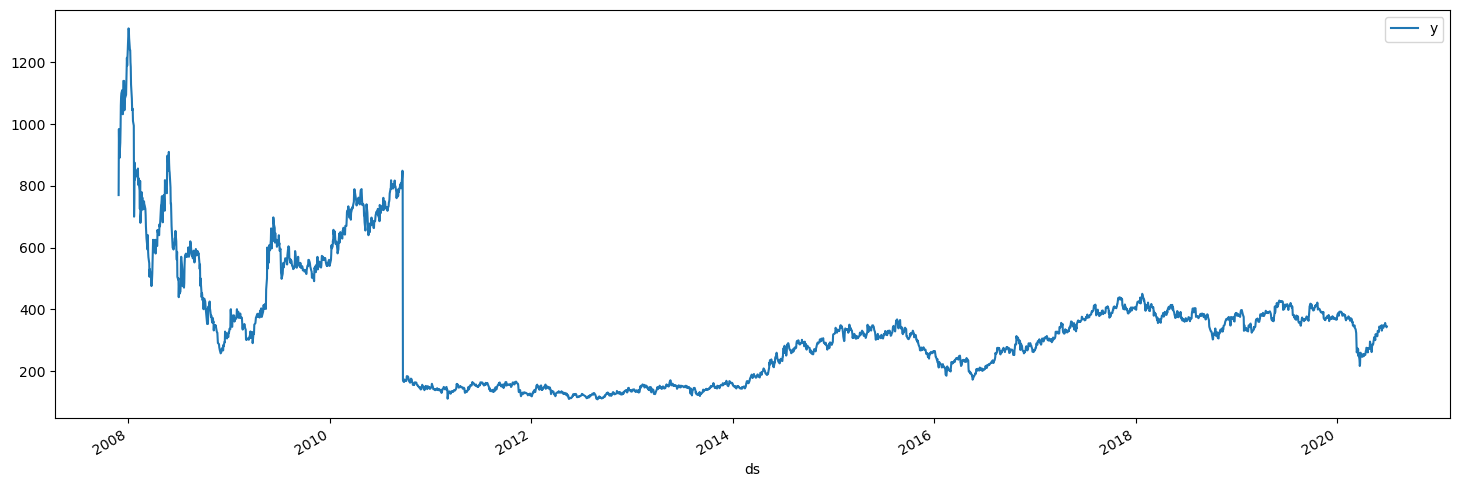

In [20]:
df.plot(x="ds",y="y",figsize=(18,6))